In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import scipy.constants as const
from scipy.integrate import solve_ivp

print('Module imported')

Module imported


In [2]:
#Initial conditions

g = const.g
C = float(input("Enter darg constant: ")) # For effects of air resistance
# Takes into consideration the factors like area of object , drag coefficient

m = float(input("Enter object mass: "))
v0 = float(input("Enter the initial velocity: "))

# Time durations of observation
t0 = 0
tf = 100

n = int(input("Enter number of angles: "))
angles = np.linspace(0, math.pi/2, n) #generate array of n angles
print('Angles: ' , angles)

Enter darg constant: .28
Enter object mass: 3
Enter the initial velocity: 60
Enter number of angles: 10
Angles:  [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633]


In [3]:
def deriv(t, u):
    x, xdot, y, ydot = u
    speed = np.hypot(xdot, ydot)
    xdotdot = -C/m * speed * xdot
    ydotdot = -C/m * speed * ydot - g
    return xdot, xdotdot, ydot, ydotdot

In [4]:
def hit_target(t, u):
    # We've hit the target if the z-coordinate is 0.
    return u[2]
# Stop the integration when we hit the target.
hit_target.terminal = True
# We must be moving downwards (don't stop before we begin moving upwards!)
hit_target.direction = -1

In [5]:
def max_height(t, u):
    # The maximum height is obtained when the z-velocity is zero.
    return u[3]


In [6]:
maxrange = np.zeros(n)

  message: 'A termination event occurred.'
     nfev: 8
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000027B182F6748>
   status: 1
  success: True
        t: array([0., 0.])
 t_events: [array([0.]), array([], dtype=float64)]
        y: array([[ 0.,  0.],
       [60., 60.],
       [ 0.,  0.],
       [ 0.,  0.]])
Time to target = 0.00 s
Range to target, xmax = 0.00 m
Maximum height, ymax = 0.00 m
  message: 'A termination event occurred.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000027B189F87B8>
   status: 1
  success: True
        t: array([0.00000000e+00, 2.35688953e-05, 2.59257849e-04, 2.61614738e-03,
       2.61850427e-02, 1.04323117e-01, 2.21083944e-01, 4.01097028e-01,
       6.76482692e-01, 1.02777688e+00, 1.11252296e+00])
 t_events: [array([1.11252296]), array([0.46402585])]
        y: array([[ 0.00000000e+00,  1.39255796e-03,  1.53080386e-02,
         1.53462739e-01,  1.4

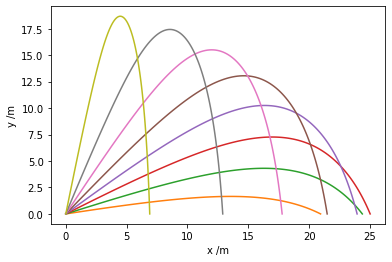

In [7]:
i = 0
for i in range(n - 1):
    # Initial conditions:
    u0 = 0, v0 * np.cos(angles[i]), 0., v0 * np.sin(angles[i])

    soln = solve_ivp(deriv, (t0, tf), u0, dense_output=True,
                     events=(hit_target, max_height))
    print(soln)
    print('Time to target = {:.2f} s'.format(soln.t_events[0][0]))
    #print('Time to highest point = {:.2f} s'.format(soln.t_events[1][0]))

    # A fine grid of time points from 0 until impact time.
    t = np.linspace(0, soln.t_events[0][0], 100)

    # Retrieve the solution for the time grid and plot the trajectory.
    sol = soln.sol(t)
    x, y = sol[0], sol[2]
    maxrange[i] = x[-1]
    print('Range to target, xmax = {:.2f} m'.format(x[-1]))
    print('Maximum height, ymax = {:.2f} m'.format(max(y)))
    plt.plot(x, y)
    plt.xlabel('x /m')
    plt.ylabel('y /m')
plt.show()

In [8]:
angles = angles / 2 / math.pi * 360 #convert radians to degrees
print('Launch Angles: \n', angles)
print('\nOptimum Angle: ', angles[np.where(maxrange==np.max(maxrange))])
print('\nThe max range:',np.max(maxrange))

Launch Angles: 
 [ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]

Optimum Angle:  [30.]

The max range: 25.022477907145532
